In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</stule>"))

In [2]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns

import csv

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date
# import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [3]:
# Read file, manually fixed quotes in given file!
df = pd.read_csv("ECDC_surveillance_data_Respiratory_Syncytial_Virus (non-sentinel numbers).csv",
                delimiter = ',',quoting=csv.QUOTE_NONE)

In [4]:
df

,HealthTopic,Population,Indicator,Unit,Time,RegionCode,RegionName,NumValue,TxtValue
0,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""DE""""","""""Germany""""",0.0,""""""""""""
1,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""DK""""","""""Denmark""""",0.0,""""""""""""
2,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""EE""""","""""Estonia""""",1.0,""""""""""""
3,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""EL""""","""""Greece""""",0.0,""""""""""""
4,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""ES""""","""""Spain""""",2.0,""""""""""""
5,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""EU31_UKX""""","""""EU/EEA""""",32.0,""""""""""""
6,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""FI""""","""""Finland""""",0.0,""""""""""""
7,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""FR""""","""""France""""",8.0,""""""""""""
8,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""IE""""","""""Ireland""""",1.0,""""""""""""
9,"""Respiratory Syncytial Virus","""""RSV Non sentinel""""","""""RSV detection""""","""""N""""","""""2014-W40""""","""""LT""""","""""Lithuania""""",2.0,""""""""""""


In [5]:
#Clean data

df["HealthTopic"] = df["HealthTopic"].str.replace('"', '')
df["Population"] = df["Population"].str.replace('""', '')
df["Indicator"] = df["Indicator"].str.replace('""', '')
df["Unit"] = df["Unit"].str.replace('""', '')
df["Time"] = df["Time"].str.replace('""', '')
df["RegionCode"] = df["RegionCode"].str.replace('""', '')
df["RegionName"] = df["RegionName"].str.replace('""', '')
df["TxtValue"] = df["TxtValue"].str.replace('""', '')

In [6]:
#Make overview of included nations
nations = df.drop_duplicates("RegionName",keep='first')
nations = nations.drop(["HealthTopic","Population","Indicator", "Unit","Time","NumValue","TxtValue"], axis=1)
nations

,RegionCode,RegionName
0,DE,Germany
1,DK,Denmark
2,EE,Estonia
3,EL,Greece
4,ES,Spain
5,EU31_UKX,EU/EEA
6,FI,Finland
7,FR,France
8,IE,Ireland
9,LT,Lithuania


In [7]:
# Add week and year column for plotting
def addweek(str):
    week = str[-2:]
    return int(week)

df["Week"] = df.Time.apply(addweek)

def addyear(str):
    year = str[:4]
    return int(year)

df["Year"] = df.Time.apply(addyear)

In [8]:
# Fix Time

def timefix(str):
    year = str[:4]
    week = str[-2:]
    return year+week

df["Time"] = df.Time.apply(timefix)
df['Time'] = pd.to_datetime(df.Time.astype(str)+'7',format='%G%V%u')


In [9]:
#Make dic of all nations in each year
Nations = nations["RegionCode"]
Nat_dic = {}
for N in Nations:
    df_N = df.loc[df['RegionCode'] == N]
    df_N
    
    N_year_dic = {}
    for year_i in range(2014,2023):
        N_year_i = df_N.loc[df_N['Year'] == year_i]
        N_year_dic[year_i] = N_year_i
    Nat_dic[N]= N_year_dic

In [10]:
# Look for Nations with high number of found cases
n_test3 = np.array([])
nat = np.array([])
for N in Nations:
    S = Nat_dic[N][2019]["NumValue"].sum()+Nat_dic[N][2018]["NumValue"].sum()+Nat_dic[N][2017]["NumValue"].sum()
    n_test3 = np.append(n_test3,S)
    nat = np.append(nat,N)
    
df_test = pd.DataFrame({
    'Nation':nat,
    'Sum':n_test3
})
df_test = df_test.set_index("Nation")
df_test.sort_values("Sum",ascending=False)


,Sum
Nation,
EU31_UKX,101782.0
FR,36423.0
SE,18390.0
ES,12301.0
DK,11973.0
NL,5358.0
IE,4430.0
SI,4232.0
PT,3850.0


In [11]:
# Isolate country (Danmark = "DK", Sverige = "SE", Tyskland = "DE", Finland = "FI" )
Nations = ["DK", "SE", "DE", "FR"]
Nat_dic = {}
for N in Nations:
    df_N = df.loc[df['RegionCode'] == N]
    df_N
    
    N_year_dic = {}
    for year_i in range(2014,2023):
        N_year_i = df_N.loc[df_N['Year'] == year_i]
        N_year_dic[year_i] = N_year_i
    Nat_dic[N]= N_year_dic

In [12]:
#Make dictonary for selected contry with year sections

# dk_year_dic = {}

# for year_i in range(2014,2023):
#     dk_year_i = df_DK.loc[df_DK['Year'] == year_i]
#     dk_year_dic[year_i] = dk_year_i

    
### This datetime fix messes up the weeks.
# for year_i in range(2014,2023):
#      dk_year_i = df_DK.loc[pd.DatetimeIndex(df_DK['Time']).year == year_i]
#      dk_year_dic[year_i] = dk_year_i

In [13]:
%matplotlib inline

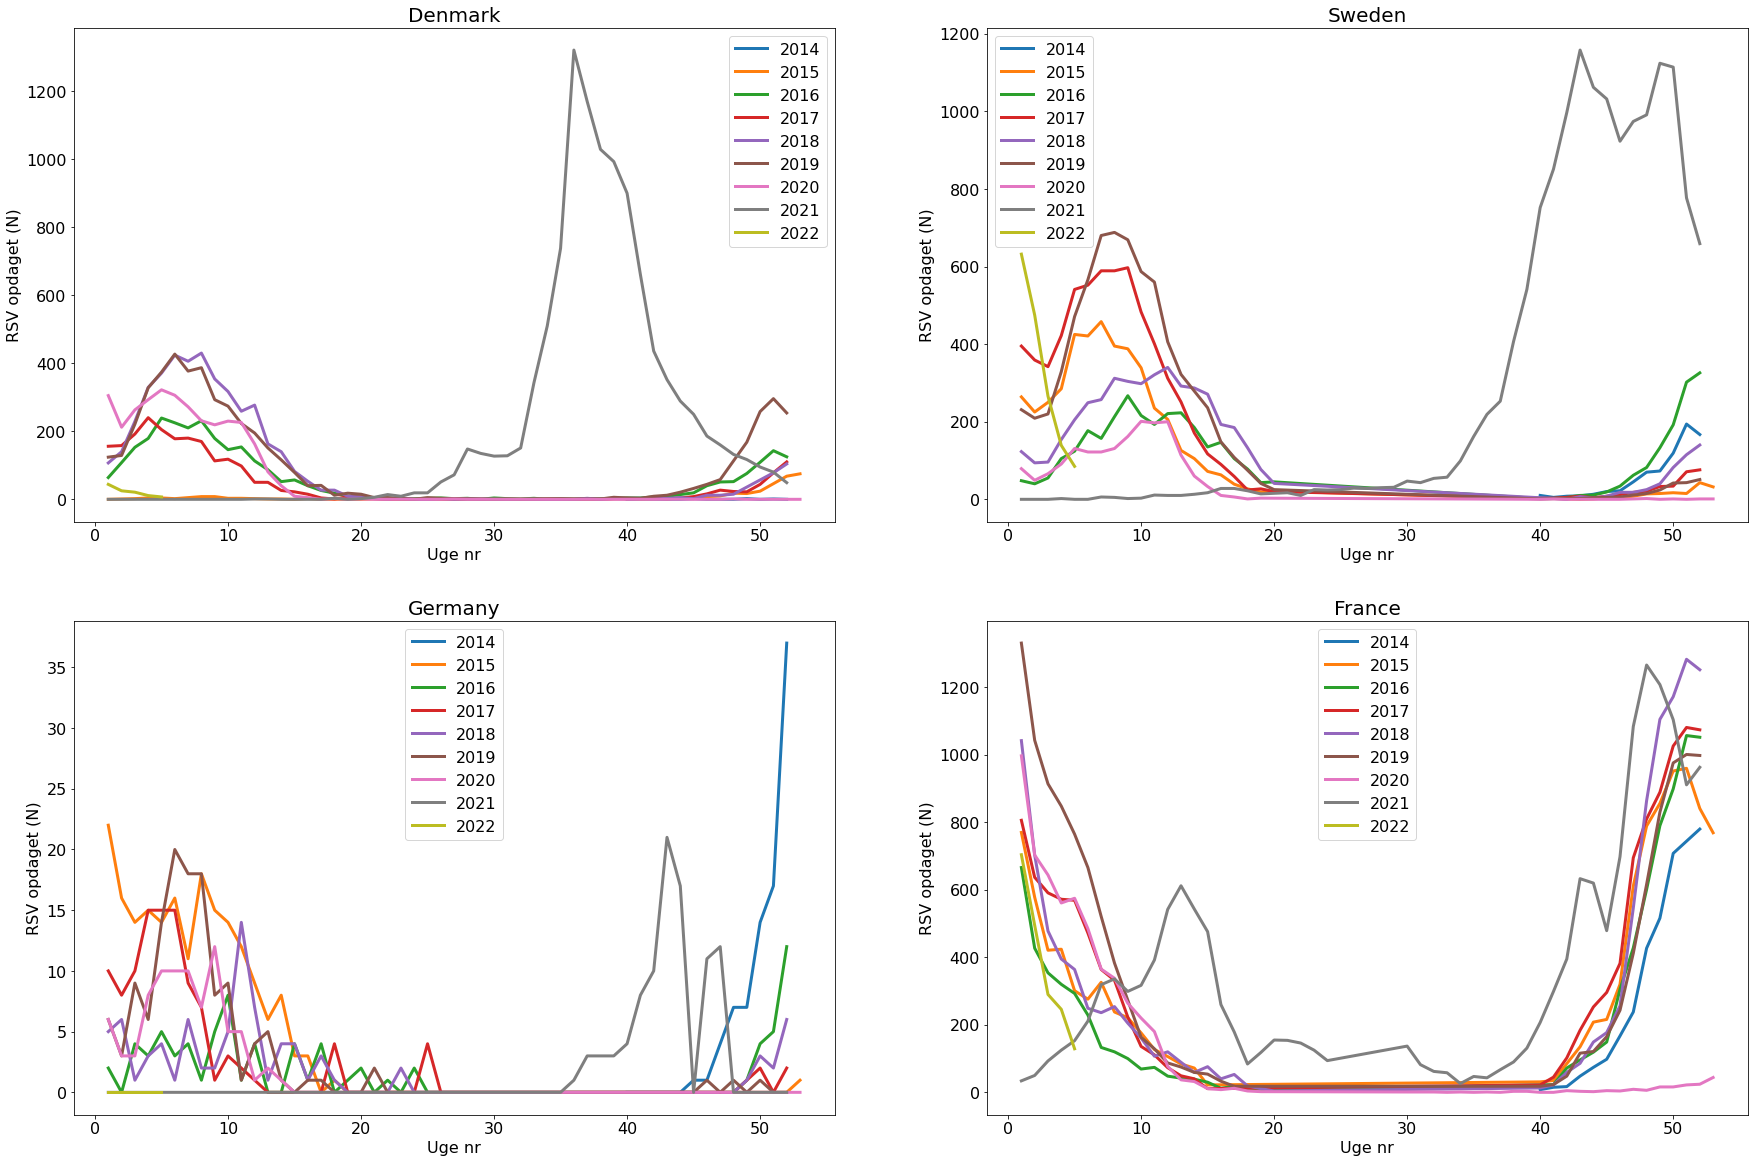

In [14]:
#Make figure with the 4 chosen countries
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(30,20))

for year_i in range(2014,2023):
    ax1.plot(Nat_dic[Nations[0]][year_i]["Week"],Nat_dic[Nations[0]][year_i]["NumValue"],"-")
ax1.legend(range(2014,2023))
ax1.set_xlabel('Uge nr')
ax1.set_ylabel('RSV opdaget (N)')
ax1.set_title(Nat_dic[Nations[0]][2020]["RegionName"].iloc[1])

for year_i in range(2014,2023):
    ax2.plot(Nat_dic[Nations[1]][year_i]["Week"],Nat_dic[Nations[1]][year_i]["NumValue"],"-")
ax2.legend(range(2014,2023))
ax2.set_xlabel('Uge nr')
ax2.set_ylabel('RSV opdaget (N)')
ax2.set_title(Nat_dic[Nations[1]][2020]["RegionName"].iloc[1])

for year_i in range(2014,2023):
    ax3.plot(Nat_dic[Nations[2]][year_i]["Week"],Nat_dic[Nations[2]][year_i]["NumValue"],"-")
ax3.legend(range(2014,2023))
ax3.set_xlabel('Uge nr')
ax3.set_ylabel('RSV opdaget (N)')
ax3.set_title(Nat_dic[Nations[2]][2020]["RegionName"].iloc[1])



for year_i in range(2014,2023):
    ax4.plot(Nat_dic[Nations[3]][year_i]["Week"],Nat_dic[Nations[3]][year_i]["NumValue"],"-")
ax4.legend(range(2014,2023))
ax4.set_xlabel('Uge nr')
ax4.set_ylabel('RSV opdaget (N)')
ax4.set_title(Nat_dic[Nations[3]][2020]["RegionName"].iloc[1])

plt.savefig('RSV_Lande.png', dpi=300)

In [15]:
# fig, ax5 = plt.subplots(1,1,figsize=(12,5))
# for year_i in range(2014,2023):
#     ax5.plot(Nat_dic[Nations[2]][year_i]["Week"],Nat_dic[Nations[2]][year_i]["NumValue"],"-")
# ax5.legend(range(2014,2023))
# ax5.set_xlabel('Uge nr')
# ax5.set_ylabel('RSV opdaget (N)')
# ax5.set_title(Nat_dic[Nations[2]][2020]["RegionName"].iloc[1])

In [16]:
data = []
for y_i in range(2014,2023):
    test_year = Nat_dic["DE"][y_i]["NumValue"].sum()
    
    data.append([int(y_i), test_year])

df = pd.DataFrame(data, columns=['Year', 'Tests'])

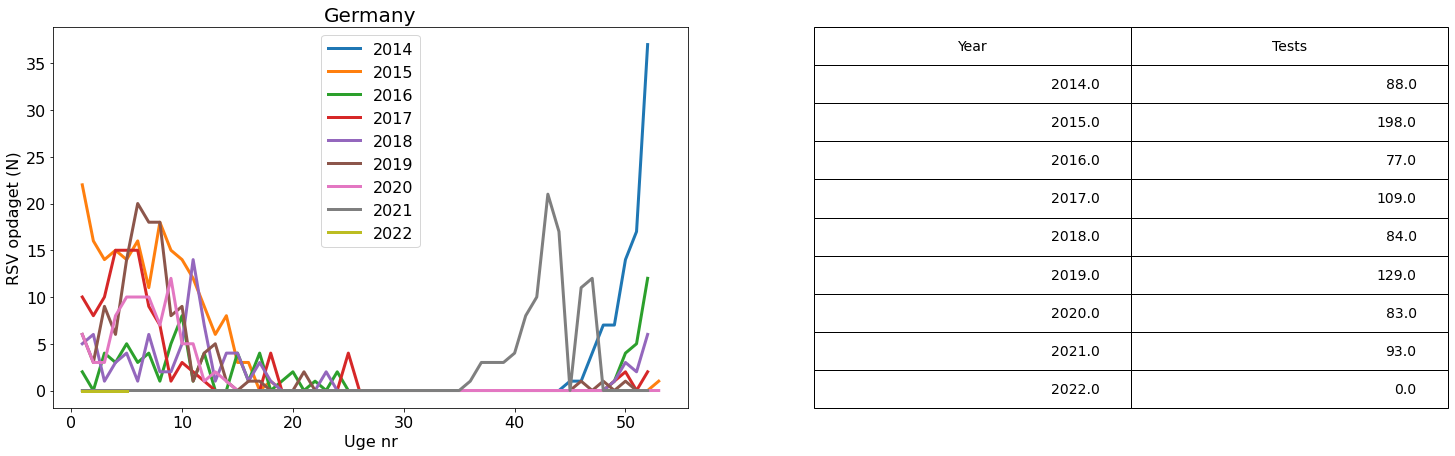

In [17]:
fig = plt.figure(figsize=(25,7))

ax5 = fig.add_subplot(121)
for year_i in range(2014,2023):
    ax5.plot(Nat_dic[Nations[2]][year_i]["Week"],Nat_dic[Nations[2]][year_i]["NumValue"],"-")
ax5.legend(range(2014,2023))
ax5.set_xlabel('Uge nr')
ax5.set_ylabel('RSV opdaget (N)')
ax5.set_title(Nat_dic[Nations[2]][2020]["RegionName"].iloc[1])

ax6 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax6.axis('off')
mpl_table = ax6.table(cellText = df.values, bbox=bbox, colLabels=df.columns)
mpl_table.auto_set_font_size(True)
mpl_table.set_fontsize(font_size)
plt.savefig('Germany.png', dpi=300)